# NVAE Experiment on CIFAR-10

This notebook implements the training and evaluation pipeline for the Nouveau VAE (NVAE) model on CIFAR-10.

## 1. Google Colab Setup
Mount Drive and clone the repository (Fresh Copy).

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
import shutil

# --- CONFIGURATION ---
REPO_PATH = '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10'
REPO_URL = "https://github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

# 1. Delete repo if it already exists (Ensure fresh code)
if os.path.exists(REPO_PATH):
    print(f"Deleting existing repository at {REPO_PATH}...")
    shutil.rmtree(REPO_PATH)

# 2. Clone repository
os.chdir('/content/drive/MyDrive')
print(f"Cloning repository to {REPO_PATH}...")
!git clone {REPO_URL}

# 3. Enter the repository
os.chdir(REPO_PATH)
print(f"Current working directory: {os.getcwd()}")

# 4. Add source code to Python path
sys.path.append(os.path.join(REPO_PATH, 'src'))

Mounted at /content/drive
Deleting existing repository at /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning repository to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning into 'Generative-Modeling-on-CIFAR-10'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 196 (delta 101), reused 105 (delta 48), pack-reused 33 (from 1)
Receiving objects: 100% (196/196), 216.86 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Updating files: 100% (38/38), done.
Current working directory: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10


## 2. GitHub Configuration (Optional)
Configure this if you want to push results back to the repo.

In [2]:
# GitHub Configuration & Setup
import os

try:
    # 1. Configure Git
    user_name = "konstantine25b"
    mail = "konstantine25b@gmail.com"

    # --- IMPORTANT: PASTE YOUR TOKEN BELOW ---
    my_token = "YOUR_TOKEN_HERE"

    if my_token == "YOUR_TOKEN_HERE":
        print("⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.")

    repo_url = f"https://{my_token}@github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

    !git config --global user.name "{user_name}"
    !git config --global user.email "{mail}"

    # 2. Set Remote URL
    if os.path.isdir(".git") and my_token != "YOUR_TOKEN_HERE":
        !git remote set-url origin "{repo_url}"
        print("Git configured successfully for pushing.")
    else:
        print("Skipping remote setup (either not a git repo or token not set).")

except Exception as e:
    print(f"Error setting up GitHub: {e}")

⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.
Skipping remote setup (either not a git repo or token not set).


## 3. Install Dependencies

In [3]:
!pip install -r requirements.txt
!pip install wandb -q

import wandb
wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: konstantine25b (konstantine25b-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## 4. Setup Experiment

In [6]:
import torch
from src.utils.data_loader import get_cifar10_loaders
from src.vae.train import train_vae
from src.vae.sampling import generate_samples, save_sample_grid
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import wandb

# Configuration
config = {
    'epochs': 150,
    'batch_size': 64,
    'lr': 1e-3,
    'hidden_dim': 64,
    'latent_dim': 20,
    'num_scales': 2,
    'warmup_epochs': 135,
    'weight_decay': 3e-4,
    'use_wandb': True, # Set to True if using WandB
    # Save checkpoints OUTSIDE the repo folder to avoid deletion during re-runs
    'model_save_dir': '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1',
    'results_dir': 'results/'
}

# Create directories
os.makedirs(config['model_save_dir'], exist_ok=True)
os.makedirs(config['results_dir'], exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
print(f"Checkpoints will be saved to: {config['model_save_dir']}")

Using device: cuda
Checkpoints will be saved to: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1


## 5. Load Data

In [7]:
train_loader, val_loader, test_loader = get_cifar10_loaders(
    data_dir='./data',
    batch_size=config['batch_size']
)

Data Loaders ready: Train=45000, Val=5000, Test=10000


## 6. Train Model

In [8]:
# Start Training
train_vae(config, train_loader, val_loader, device)

Model initialized on cuda
Resuming from checkpoint: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_125.pth
Resumed training from epoch 125


Epoch 126/150: 100%|██████████| 704/704 [01:34<00:00,  7.43it/s, loss=12225.41, bpd=5.74, beta=0.93]


=== Epoch 126 Summary ===
Train Loss: 9496.6284 | Recon: 8282.0081 | KL: 1301.3789 | BPD: 4.4599


Val Loss:   9539.1308 | Val BPD: 4.4798
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_126.pth


Epoch 127/150: 100%|██████████| 704/704 [01:32<00:00,  7.63it/s, loss=11074.70, bpd=5.20, beta=0.94]


=== Epoch 127 Summary ===
Train Loss: 9496.9814 | Recon: 8268.8432 | KL: 1305.5013 | BPD: 4.4600


Val Loss:   9498.6365 | Val BPD: 4.4608
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_127.pth


Epoch 128/150: 100%|██████████| 704/704 [01:32<00:00,  7.63it/s, loss=11202.13, bpd=5.26, beta=0.95]


=== Epoch 128 Summary ===
Train Loss: 9504.6117 | Recon: 8267.9387 | KL: 1304.3036 | BPD: 4.4636


Val Loss:   9482.2687 | Val BPD: 4.4531
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9482.2687)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_128.pth


Epoch 129/150: 100%|██████████| 704/704 [01:32<00:00,  7.62it/s, loss=12078.61, bpd=5.67, beta=0.96]


=== Epoch 129 Summary ===
Train Loss: 9515.7570 | Recon: 8272.9668 | KL: 1300.5945 | BPD: 4.4689


Val Loss:   9486.5561 | Val BPD: 4.4551
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_129.pth


Epoch 130/150: 100%|██████████| 704/704 [01:32<00:00,  7.60it/s, loss=13459.53, bpd=6.32, beta=0.96]


=== Epoch 130 Summary ===
Train Loss: 9526.9789 | Recon: 8276.7733 | KL: 1298.2904 | BPD: 4.4741


Val Loss:   9519.3033 | Val BPD: 4.4705
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_130.pth


Epoch 131/150: 100%|██████████| 704/704 [01:31<00:00,  7.65it/s, loss=11635.80, bpd=5.46, beta=0.97]


=== Epoch 131 Summary ===
Train Loss: 9531.1019 | Recon: 8275.1203 | KL: 1294.3322 | BPD: 4.4761


Val Loss:   9482.1607 | Val BPD: 4.4531
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9482.1607)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_131.pth


Epoch 132/150: 100%|██████████| 704/704 [01:31<00:00,  7.65it/s, loss=9146.37, bpd=4.30, beta=0.98]


=== Epoch 132 Summary ===
Train Loss: 9539.4658 | Recon: 8276.1946 | KL: 1291.9819 | BPD: 4.4800


Val Loss:   9479.0029 | Val BPD: 4.4516
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9479.0029)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_132.pth


Epoch 133/150: 100%|██████████| 704/704 [01:32<00:00,  7.62it/s, loss=11898.89, bpd=5.59, beta=0.99]


=== Epoch 133 Summary ===
Train Loss: 9546.6240 | Recon: 8277.0945 | KL: 1288.6201 | BPD: 4.4834


Val Loss:   9580.4467 | Val BPD: 4.4992
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_133.pth


Epoch 134/150: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=11190.08, bpd=5.26, beta=0.99]


=== Epoch 134 Summary ===
Train Loss: 9547.4840 | Recon: 8270.8157 | KL: 1286.1957 | BPD: 4.4838


Val Loss:   9492.8457 | Val BPD: 4.4581
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_134.pth


Epoch 135/150: 100%|██████████| 704/704 [01:32<00:00,  7.65it/s, loss=13899.37, bpd=6.53, beta=1.00]


=== Epoch 135 Summary ===
Train Loss: 9559.7067 | Recon: 8277.6139 | KL: 1282.0928 | BPD: 4.4895


Val Loss:   9525.1967 | Val BPD: 4.4733
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_135.pth


Epoch 136/150: 100%|██████████| 704/704 [01:32<00:00,  7.63it/s, loss=9515.52, bpd=4.47, beta=1.00]


=== Epoch 136 Summary ===
Train Loss: 9556.7997 | Recon: 8274.7694 | KL: 1282.0303 | BPD: 4.4881


Val Loss:   9466.3890 | Val BPD: 4.4457
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9466.3890)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_136.pth


Epoch 137/150: 100%|██████████| 704/704 [01:32<00:00,  7.62it/s, loss=23222.45, bpd=10.91, beta=1.00]


=== Epoch 137 Summary ===
Train Loss: 9571.2637 | Recon: 8288.9220 | KL: 1282.3417 | BPD: 4.4949


Val Loss:   9579.3873 | Val BPD: 4.4987
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_137.pth


Epoch 138/150: 100%|██████████| 704/704 [01:31<00:00,  7.65it/s, loss=13247.79, bpd=6.22, beta=1.00]


=== Epoch 138 Summary ===
Train Loss: 9558.6729 | Recon: 8276.4060 | KL: 1282.2669 | BPD: 4.4890


Val Loss:   9504.8657 | Val BPD: 4.4637
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_138.pth


Epoch 139/150: 100%|██████████| 704/704 [01:32<00:00,  7.59it/s, loss=12484.61, bpd=5.86, beta=1.00]


=== Epoch 139 Summary ===
Train Loss: 9552.8287 | Recon: 8270.2840 | KL: 1282.5448 | BPD: 4.4863


Val Loss:   9487.8149 | Val BPD: 4.4557
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_139.pth


Epoch 140/150: 100%|██████████| 704/704 [01:33<00:00,  7.56it/s, loss=10696.46, bpd=5.02, beta=1.00]


=== Epoch 140 Summary ===
Train Loss: 9552.5922 | Recon: 8269.3501 | KL: 1283.2421 | BPD: 4.4862


Val Loss:   9487.2083 | Val BPD: 4.4555
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_140.pth


Epoch 141/150: 100%|██████████| 704/704 [01:32<00:00,  7.61it/s, loss=12618.18, bpd=5.93, beta=1.00]


=== Epoch 141 Summary ===
Train Loss: 9547.1434 | Recon: 8261.8414 | KL: 1285.3021 | BPD: 4.4836


Val Loss:   9528.7492 | Val BPD: 4.4750
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_141.pth


Epoch 142/150: 100%|██████████| 704/704 [01:32<00:00,  7.62it/s, loss=13496.15, bpd=6.34, beta=1.00]


=== Epoch 142 Summary ===
Train Loss: 9547.7800 | Recon: 8262.9015 | KL: 1284.8785 | BPD: 4.4839


Val Loss:   9455.6668 | Val BPD: 4.4406
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9455.6668)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_142.pth


Epoch 143/150: 100%|██████████| 704/704 [01:31<00:00,  7.68it/s, loss=14097.58, bpd=6.62, beta=1.00]


=== Epoch 143 Summary ===
Train Loss: 9554.0176 | Recon: 8268.3115 | KL: 1285.7061 | BPD: 4.4868


Val Loss:   9464.4258 | Val BPD: 4.4448
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_143.pth


Epoch 144/150: 100%|██████████| 704/704 [01:31<00:00,  7.69it/s, loss=10530.41, bpd=4.95, beta=1.00]


=== Epoch 144 Summary ===
Train Loss: 9543.1444 | Recon: 8257.5570 | KL: 1285.5874 | BPD: 4.4817


Val Loss:   9467.2411 | Val BPD: 4.4461
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_144.pth


Epoch 145/150: 100%|██████████| 704/704 [01:31<00:00,  7.67it/s, loss=10101.12, bpd=4.74, beta=1.00]


=== Epoch 145 Summary ===
Train Loss: 9539.8792 | Recon: 8252.8383 | KL: 1287.0409 | BPD: 4.4802


Val Loss:   9459.3192 | Val BPD: 4.4424
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_145.pth


Epoch 146/150: 100%|██████████| 704/704 [01:31<00:00,  7.67it/s, loss=13035.49, bpd=6.12, beta=1.00]


=== Epoch 146 Summary ===
Train Loss: 9538.2145 | Recon: 8251.0453 | KL: 1287.1692 | BPD: 4.4794


Val Loss:   9462.4056 | Val BPD: 4.4438
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_146.pth


Epoch 147/150: 100%|██████████| 704/704 [01:32<00:00,  7.64it/s, loss=13889.37, bpd=6.52, beta=1.00]


=== Epoch 147 Summary ===
Train Loss: 9545.8228 | Recon: 8258.4026 | KL: 1287.4201 | BPD: 4.4830


Val Loss:   9500.4931 | Val BPD: 4.4617
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_147.pth


Epoch 148/150: 100%|██████████| 704/704 [01:31<00:00,  7.70it/s, loss=12708.72, bpd=5.97, beta=1.00]


=== Epoch 148 Summary ===
Train Loss: 9546.8449 | Recon: 8259.8442 | KL: 1287.0007 | BPD: 4.4835


Val Loss:   9459.0187 | Val BPD: 4.4422
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_148.pth


Epoch 149/150: 100%|██████████| 704/704 [01:31<00:00,  7.65it/s, loss=13894.08, bpd=6.53, beta=1.00]


=== Epoch 149 Summary ===
Train Loss: 9537.5185 | Recon: 8249.2282 | KL: 1288.2903 | BPD: 4.4791


Val Loss:   9492.7828 | Val BPD: 4.4581
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_149.pth


Epoch 150/150: 100%|██████████| 704/704 [01:32<00:00,  7.64it/s, loss=10596.46, bpd=4.98, beta=1.00]


=== Epoch 150 Summary ===
Train Loss: 9536.4431 | Recon: 8247.1692 | KL: 1289.2739 | BPD: 4.4786


Val Loss:   9493.8731 | Val BPD: 4.4586
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_150.pth


## 7. Final Evaluation on Test Set

In [9]:
from src.vae.train import evaluate, evaluate_with_importance_sampling
from src.vae.model import NVAE

# 1. Load the best model
best_model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

best_model_path = os.path.join(config['model_save_dir'], 'nvae_best.pth')
best_model.load_state_dict(torch.load(best_model_path))
print(f"Loaded best model from {best_model_path}")

# 2. Standard Evaluation (ELBO)
test_loss, test_bpd = evaluate(best_model, test_loader, device)
print(f"Standard Test Set Results (ELBO) -> Loss: {test_loss:.4f} | BPD: {test_bpd:.4f}")

# 3. Importance Weighted Evaluation (Tighter Bound, Slower)
# k=100 provides a good balance between speed and accuracy for debugging
# Paper uses k=1000
iw_loss, iw_bpd = evaluate_with_importance_sampling(best_model, test_loader, device, k=100)
print(f"Importance Weighted Results (k=100) -> Loss: {iw_loss:.4f} | BPD: {iw_bpd:.4f}")

# 4. Log to WandB
if wandb.run is not None:
    wandb.log({
        "test/final_loss": test_loss,
        "test/final_bpd": test_bpd,
        "test/iwelbo_loss": iw_loss,
        "test/iwelbo_bpd": iw_bpd
    })
    print("Logged test results to WandB.")

Loaded best model from /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth
Standard Test Set Results (ELBO) -> Loss: 9424.4569 | BPD: 4.4260
Starting Importance Weighted Evaluation (k=100)...


IWELBO Eval: 100%|██████████| 157/157 [11:30<00:00,  4.40s/it]

Importance Weighted Results (k=100) -> Loss: 9331.2292 | BPD: 4.3822
Logged test results to WandB.


## 8. Generate Samples & Log to WandB

Loaded best model.


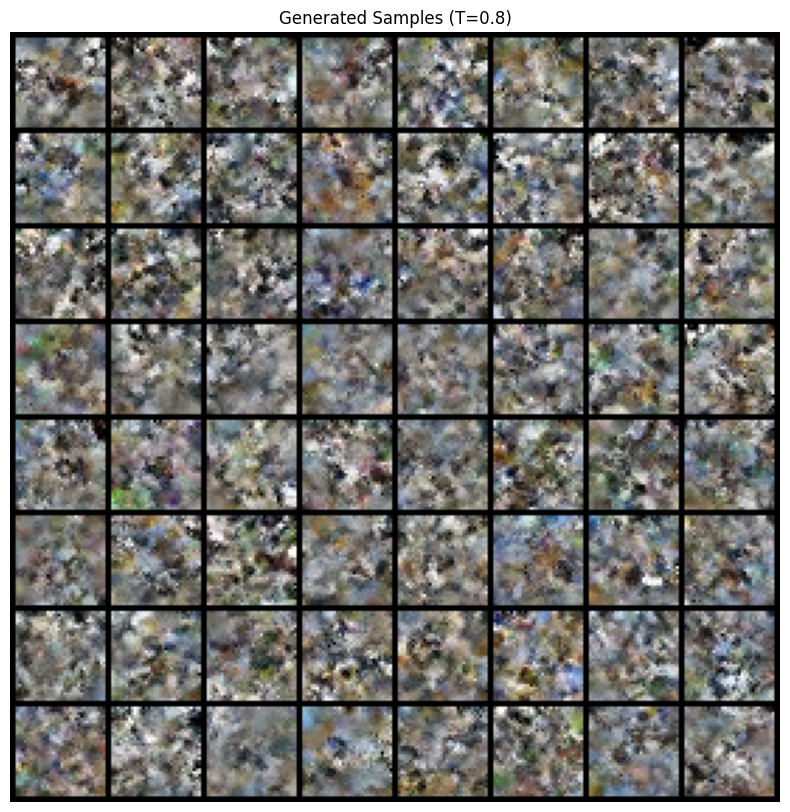

Logged final samples to WandB.


In [10]:
# Load best model (automatically saved during training)
from src.vae.model import NVAE
import torchvision.utils as vutils

model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

model.load_state_dict(torch.load(os.path.join(config['model_save_dir'], 'nvae_best.pth')))
print("Loaded best model.")

# Generate
samples = generate_samples(model, num_samples=64, temperature=0.8, device=device)

# Visualize locally
plt.figure(figsize=(10, 10))
grid_img = vutils.make_grid(samples, nrow=8, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Generated Samples (T=0.8)")
plt.show()

# Log to WandB if active
if wandb.run is not None:
    wandb.log({
        "final_evaluation/generated_samples_grid": [wandb.Image(grid_img, caption="Final Generated Samples (T=0.8)")]
    })
    print("Logged final samples to WandB.")